In [1]:
%matplotlib notebook
import pandas as pd
import glob
import json
from pprint import pprint
from collections import OrderedDict

import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
files = sorted(glob.glob("data/metal_box/*.json"))
files

['data/metal_box/data_2019-05-17-124751.json',
 'data/metal_box/data_2019-05-17-124810.json',
 'data/metal_box/data_2019-05-17-124839.json',
 'data/metal_box/data_2019-05-17-124854.json',
 'data/metal_box/data_2019-05-17-124913.json',
 'data/metal_box/data_2019-05-17-124926.json']

<IPython.core.display.Javascript object>


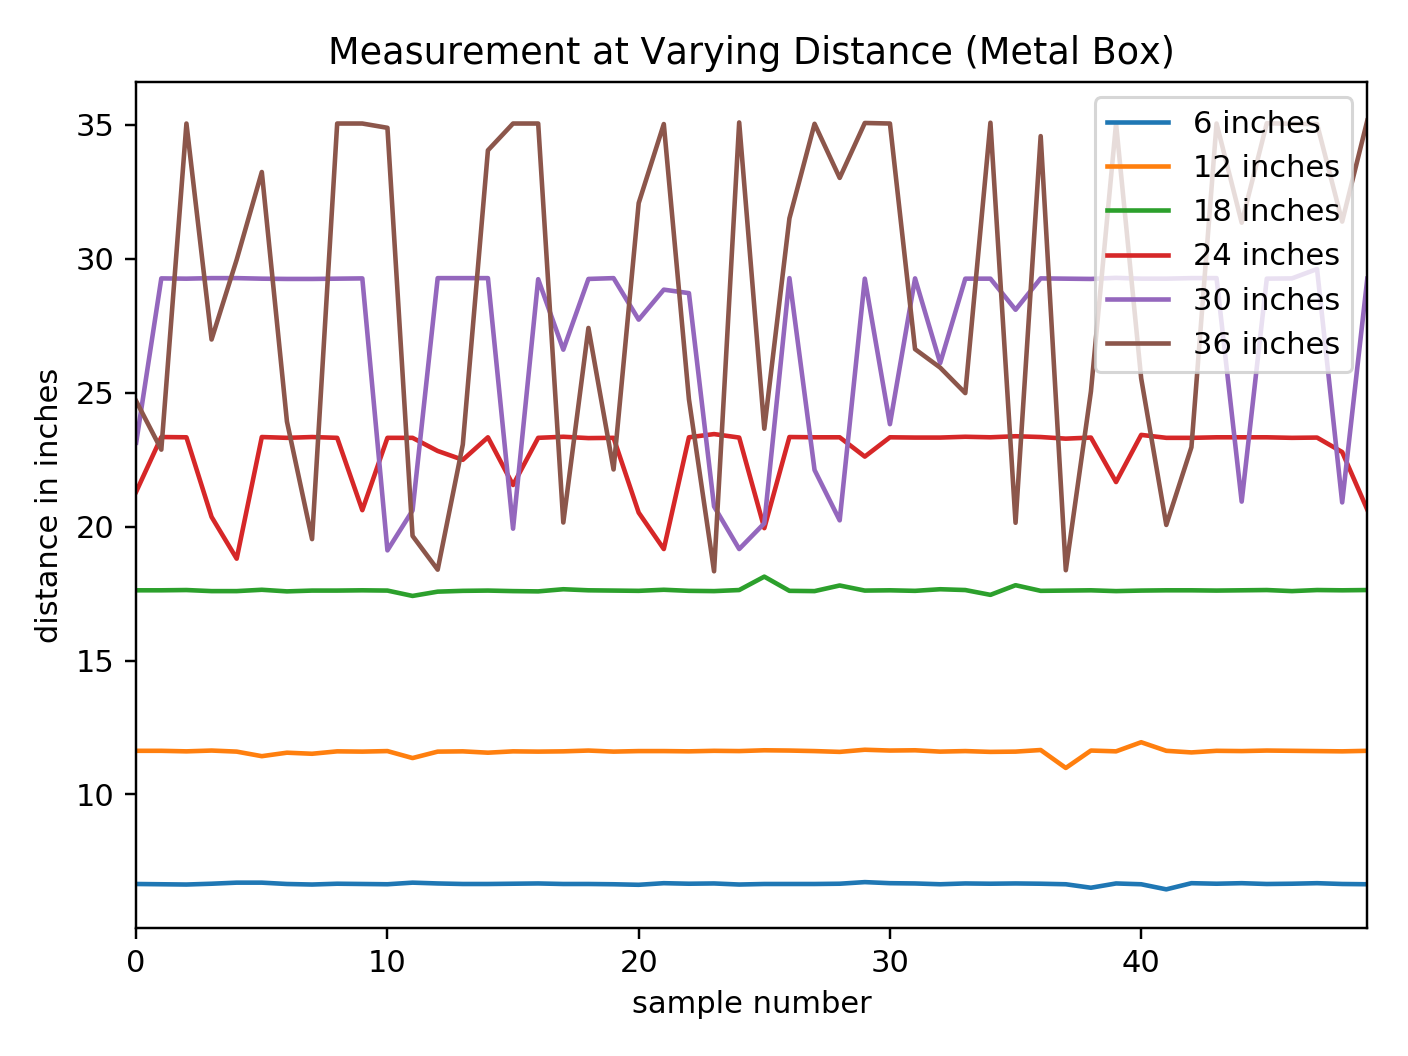

In [3]:
dfs = {}
fig, ax = plt.subplots()
lengths = [6,12, 18, 24, 30, 36]

for idx, f in enumerate(files):
    raw = []
    datafile = f
    with open(datafile, "r") as f:
        for row in f:
            item = json.loads(row)
            raw.append(item)

    def transform(instance):
        obj = {
            "time": instance["time"]["start"],
        }
        obj.update(instance["distance"])
        return obj

    data = [transform(ii) for ii in raw]
    df = pd.DataFrame(data[:50])["inches"]
    df.name = "{} inches".format(lengths[idx])
    dfs[idx] = df
#     display()
    tmpax = dfs[idx].plot(ax=ax, legend=True)

ax.set_ylabel("distance in inches")
ax.set_xlabel("sample number")
ax.legend(loc=1)
ax.set_title("Measurement at Varying Distance (Metal Box)")
plt.tight_layout()
plt.show()

In [4]:
df_box = pd.concat(dfs.values(), axis=1)
display(df_box.head())
display(df_box.describe())

,6 inches,12 inches,18 inches,24 inches,30 inches,36 inches
0,6.66,11.63,17.62,21.30,23.13,24.68
1,6.65,11.63,17.62,23.34,29.26,22.87
2,6.64,11.61,17.63,23.33,29.25,35.04
3,6.67,11.64,17.59,20.36,29.27,26.98
4,6.71,11.60,17.59,18.80,29.27,29.96


,6 inches,12 inches,18 inches,24 inches,30 inches,36 inches
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000
mean,6.662000,11.600800,17.62260,22.702800,27.068000,28.938800
std,0.041107,0.112954,0.09271,1.220873,3.623902,6.129685
min,6.460000,10.990000,17.41000,18.800000,19.110000,18.330000
25%,6.652500,11.600000,17.60000,22.790000,26.225000,23.717500
50%,6.665000,11.620000,17.61000,23.315000,29.250000,31.360000
75%,6.680000,11.630000,17.62750,23.330000,29.260000,35.037500
max,6.730000,11.950000,18.13000,23.450000,29.610000,35.150000


# At Wall

In [5]:
files = sorted(glob.glob("data/wall/*.json"))
files

['data/wall/data_2019-05-17-132502.json',
 'data/wall/data_2019-05-17-132512.json',
 'data/wall/data_2019-05-17-132522.json',
 'data/wall/data_2019-05-17-132534.json',
 'data/wall/data_2019-05-17-132549.json',
 'data/wall/data_2019-05-17-132628.json',
 'data/wall/data_2019-05-17-132632.json']

<IPython.core.display.Javascript object>


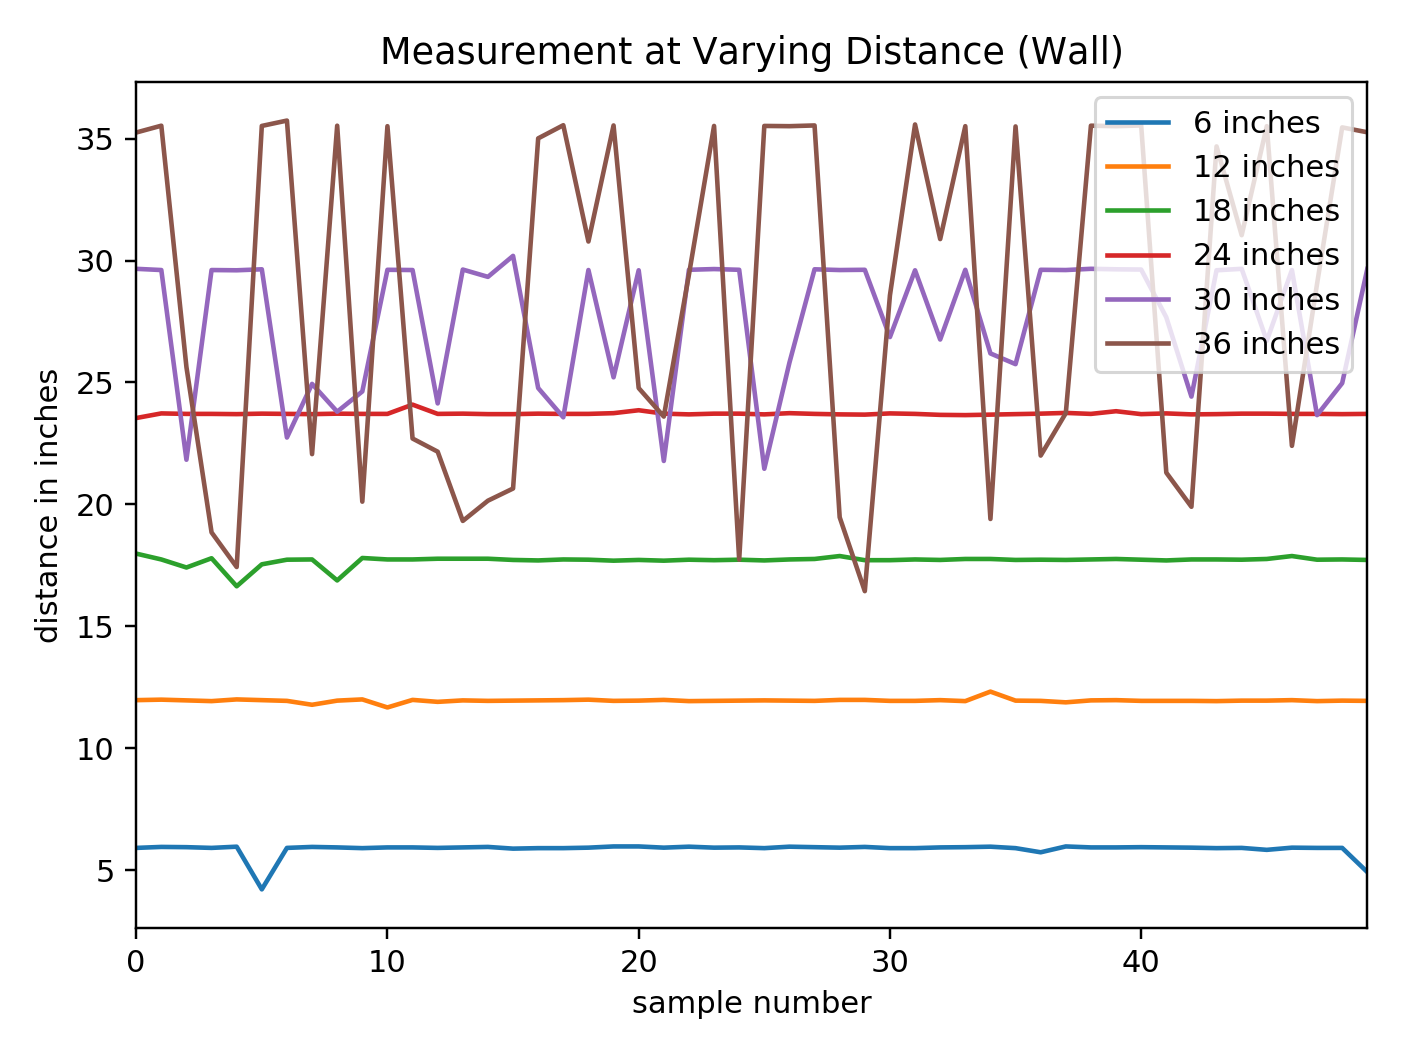

In [13]:
dfs = {}
fig, ax = plt.subplots()
lengths = [6, 12, 18, 24, 30, 36]

for idx, f in enumerate(files[:-1]):
    raw = []
    datafile = f
    with open(datafile, "r") as f:
        for row in f:
            item = json.loads(row)
            raw.append(item)

    def transform(instance):
        obj = {
            "time": instance["time"]["start"],
        }
        obj.update(instance["distance"])
        return obj

    data = [transform(ii) for ii in raw]
    df = pd.DataFrame(data[:50])["inches"]
    df.name = "{} inches".format(lengths[idx])
    dfs[idx] = df
#     display()
    tmpax = dfs[idx].plot(ax=ax, legend=True)

ax.set_ylabel("distance in inches")
ax.set_xlabel("sample number")
ax.legend(loc=1)
ax.set_title("Measurement at Varying Distance (Wall)")
plt.tight_layout()
plt.show()

In [15]:
df = pd.concat(dfs.values(), axis=1)
display(df.head())
display(df.describe())

,6 inches,12 inches,18 inches,24 inches,30 inches,36 inches
0,5.91,11.97,17.98,23.54,29.66,35.25
1,5.95,11.99,17.74,23.73,29.61,35.53
2,5.94,11.96,17.41,23.71,21.83,25.63
3,5.91,11.93,17.79,23.71,29.61,18.85
4,5.96,12.00,16.64,23.70,29.60,17.43


,6 inches,12 inches,18 inches,24 inches,30 inches,36 inches
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,5.866800,11.951000,17.696400,23.718400,27.540800,28.697800
std,0.280389,0.074155,0.208334,0.066742,2.726003,7.064371
min,4.210000,11.670000,16.640000,23.540000,21.460000,16.440000
25%,5.902500,11.940000,17.720000,23.700000,25.030000,22.015000
50%,5.920000,11.950000,17.730000,23.710000,29.600000,30.830000
75%,5.940000,11.970000,17.755000,23.720000,29.620000,35.510000
max,5.970000,12.320000,17.980000,24.090000,30.190000,35.740000


<IPython.core.display.Javascript object>


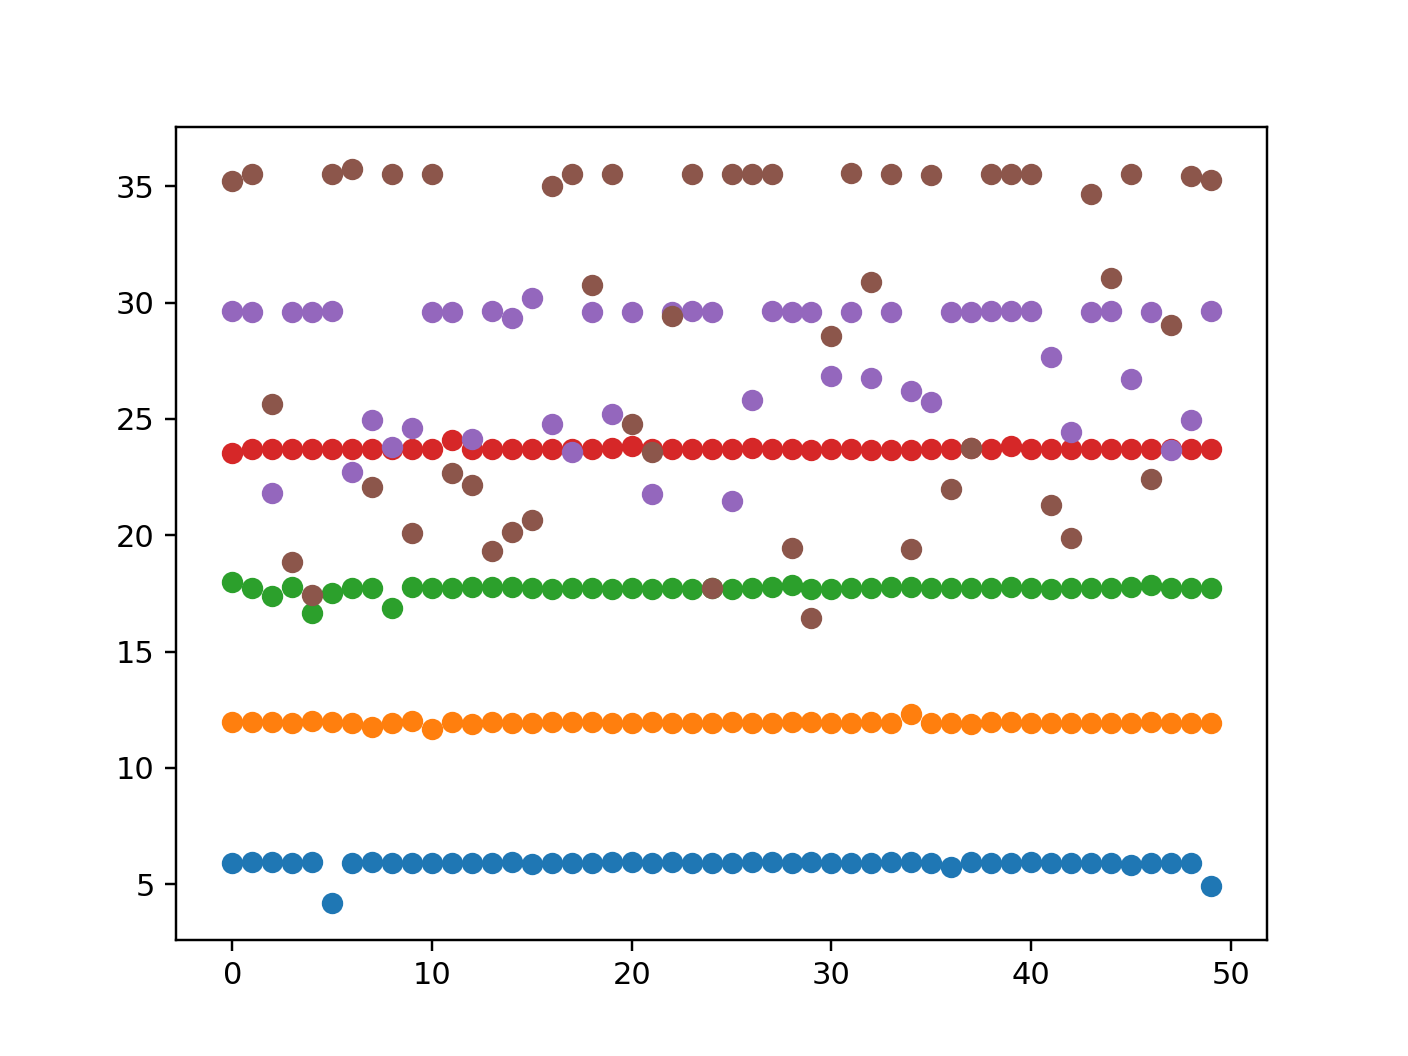

In [21]:
for ll in lengths:
    plt.scatter(df.index, df[f"{ll} inches"])
